In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [ ]:
# dataset directories
train_dir = "archive/data/train"
test_dir = "archive/data/test"
val_dir= "archive/data/val"

# Image parameters
img_width, img_height = 224, 224
batch_size = 32

# Define the number of classes (real and fake)
num_classes = 2

# Calculate the number of training and testing samples separately for real and fake images
num_train_real_samples = len(os.listdir(os.path.join(train_dir, 'real')))
num_train_fake_samples = len(os.listdir(os.path.join(train_dir, 'fake')))

num_test_real_samples = len(os.listdir(os.path.join(test_dir, 'real')))
num_test_fake_samples = len(os.listdir(os.path.join(test_dir, 'fake')))

# Calculate the total number of training and testing samples
num_train_samples = num_train_real_samples + num_train_fake_samples
num_test_samples = num_test_real_samples + num_test_fake_samples

# Data preprocessing

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary'
)


Found 11448 images belonging to 2 classes.
Found 3103 images belonging to 2 classes.
Found 1257 images belonging to 2 classes.


In [ ]:
model = keras.Sequential()

# Add convolutional layers
model.add(layers.Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Add fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
    run_eagerly=True
)
history = model.fit(
    train_generator,
    steps_per_epoch=num_train_samples // batch_size,
    epochs=30,  # Adjust the number of epochs as needed
    validation_data=test_generator,
    validation_steps=num_test_samples // batch_size
)
model.save('DL_cnn_model.h5')

Epoch 1/30
357/357 [==============================] - 697s 2s/step - loss: 0.7286 - accuracy: 0.5310 - val_loss: 0.6896 - val_accuracy: 0.5381
Epoch 2/30
357/357 [==============================] - 633s 2s/step - loss: 0.6844 - accuracy: 0.5635 - val_loss: 0.6387 - val_accuracy: 0.6562
Epoch 3/30
357/357 [==============================] - 643s 2s/step - loss: 0.6473 - accuracy: 0.6309 - val_loss: 0.5963 - val_accuracy: 0.6823
Epoch 4/30
357/357 [==============================] - 665s 2s/step - loss: 0.6279 - accuracy: 0.6566 - val_loss: 0.6344 - val_accuracy: 0.6729
Epoch 5/30
357/357 [==============================] - 670s 2s/step - loss: 0.6443 - accuracy: 0.6310 - val_loss: 0.6540 - val_accuracy: 0.5804
Epoch 6/30
357/357 [==============================] - 664s 2s/step - loss: 0.6353 - accuracy: 0.6417 - val_loss: 0.5769 - val_accuracy: 0.7025
Epoch 7/30
357/357 [==============================] - 674s 2s/step - loss: 0.6574 - accuracy: 0.6179 - val_loss: 0.6962 - val_accuracy: 0.5104

In [ ]:
accuracy = model.evaluate(test_generator)
print(f"Accuracy: {accuracy[1]*100:.2f}%")

97/97 [==============================] - 41s 421ms/step - loss: 0.6164 - accuracy: 0.7141
Accuracy: 71.41%


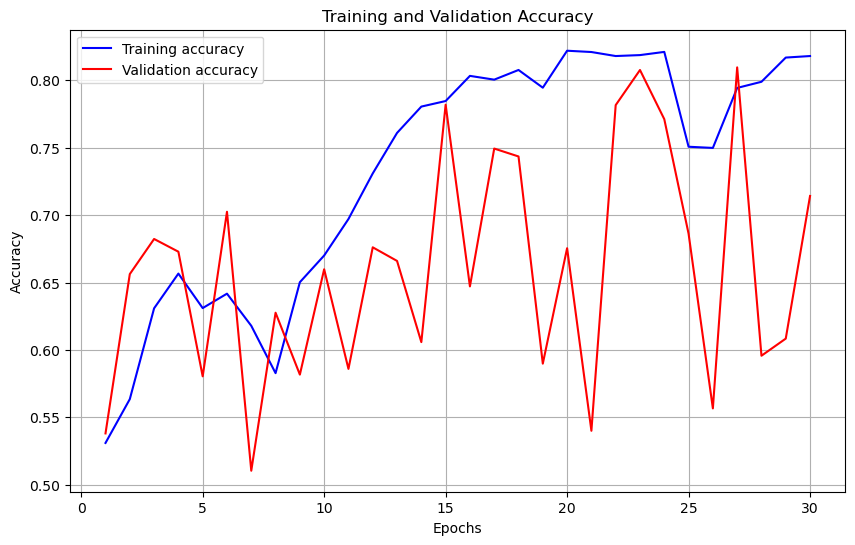

In [ ]:

import matplotlib.pyplot as plt

# Access the training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()
